In [2]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import gc
import math
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s

def delta(Rp, Rs):
    delta = (Rp*R_earth / (Rs*R_sun))**2*1e6
    return delta

def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

def sigma_s(t, sigma_LC, cdppindex): #t/hour
    t_LC=1765.5/hour 

    return sigma_LC*(t/t_LC)**cdppindex

def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1
    
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1
    
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo


/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


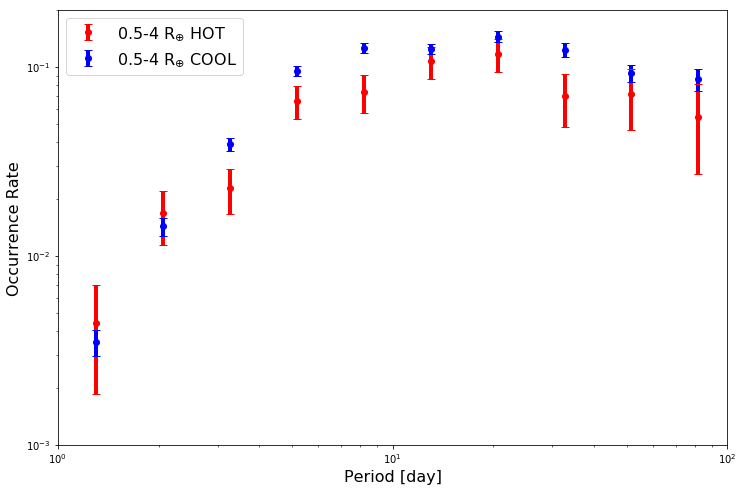

In [5]:
SLTELLAR_DATA=pd.read_csv('data/DAI2020STELLAR_MS_NOBINARY_HOT_DEFINITION2_2SIGMA.csv')
PLANET_DATA=pd.read_csv('data/DAI2020PLANET_MS_NOBINARY_HOT_DEFINITION2_2SIGMA.csv')

bins_period=np.logspace(math.log(0.4,10),math.log(400,10),16,base=10)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  
bins_t=np.logspace(math.log(120,5),math.log(6000,5),30,base=5)

focc=pd.read_csv('result/DAI2020_HOT_OCCURRENCE.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

fig=plt.figure(figsize=(12,8))

f_p1=[]
f_p_std=[]
p=[]
p_std=[]
a_ratio=[]
a_ratio_std=[]
#and koi_table['koi_disposition'][j]!='FALSE POSITIVE' \
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    a_ratio_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if PLANET_DATA['koi_period'][f_id[j]]<bins_period[i+1] and PLANET_DATA['koi_period'][f_id[j]]>=bins_period[i] and PLANET_DATA['koi_score'][f_id[j]]>=0.9 and PLANET_DATA['iso_koi_prad'][f_id[j]]<=4 and PLANET_DATA['iso_koi_prad'][f_id[j]]>=0.5 and PLANET_DATA['koi_period'][f_id[j]]<=365:
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(PLANET_DATA['koi_period'][f_id[j]])
            
    f_p1.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append((bins_period[i+1]+bins_period[i])/2)
    p_std.append(np.std(p_temp))
plt.errorbar(p,f_p1,yerr=f_p_std,fmt="o",color='red',elinewidth=4,capsize=4,label='0.5-4 R$_{\oplus}$ HOT') 

SLTELLAR_DATA=pd.read_csv('data/DAI2020STELLAR_MS_NOBINARY_COOL_DEFINITION2_2SIGMA.csv')
PLANET_DATA=pd.read_csv('data/DAI2020PLANET_MS_NOBINARY_COOL_DEFINITION2_2SIGMA.csv')

#bins_period=np.logspace(math.log(0.4,10),math.log(400,10),16,base=10)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  
bins_t=np.logspace(math.log(120,5),math.log(6000,5),30,base=5)

focc=pd.read_csv('result/DAI2020_COOL_OCCURRENCE.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

f_p1=[]
f_p_std=[]
p=[]
p_std=[]
a_ratio=[]
a_ratio_std=[]
#and koi_table['koi_disposition'][j]!='FALSE POSITIVE' \
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    a_ratio_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if PLANET_DATA['koi_period'][f_id[j]]<bins_period[i+1] and PLANET_DATA['koi_period'][f_id[j]]>=bins_period[i] and PLANET_DATA['koi_score'][f_id[j]]>=0.9 and PLANET_DATA['iso_koi_prad'][f_id[j]]<=4 and PLANET_DATA['iso_koi_prad'][f_id[j]]>=0.5 and PLANET_DATA['koi_period'][f_id[j]]<=365:
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(PLANET_DATA['koi_period'][f_id[j]])
            
    f_p1.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append((bins_period[i+1]+bins_period[i])/2)
    p_std.append(np.std(p_temp))
plt.errorbar(p,f_p1,yerr=f_p_std,fmt="o",color='blue',elinewidth=4,capsize=4,label='0.5-4 R$_{\oplus}$ COOL') 


plt.xscale('log')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2e-1)
plt.xlim(1e0,1e2)
plt.xlabel('Period [day]', fontsize=16)
plt.ylabel('Occurrence Rate',fontsize=16)
plt.legend(loc='best',fontsize=16)

plt.savefig('result/HOT_COOL_PLANET_RAD_0.5_4.png',dpi=300)

/home/dyz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


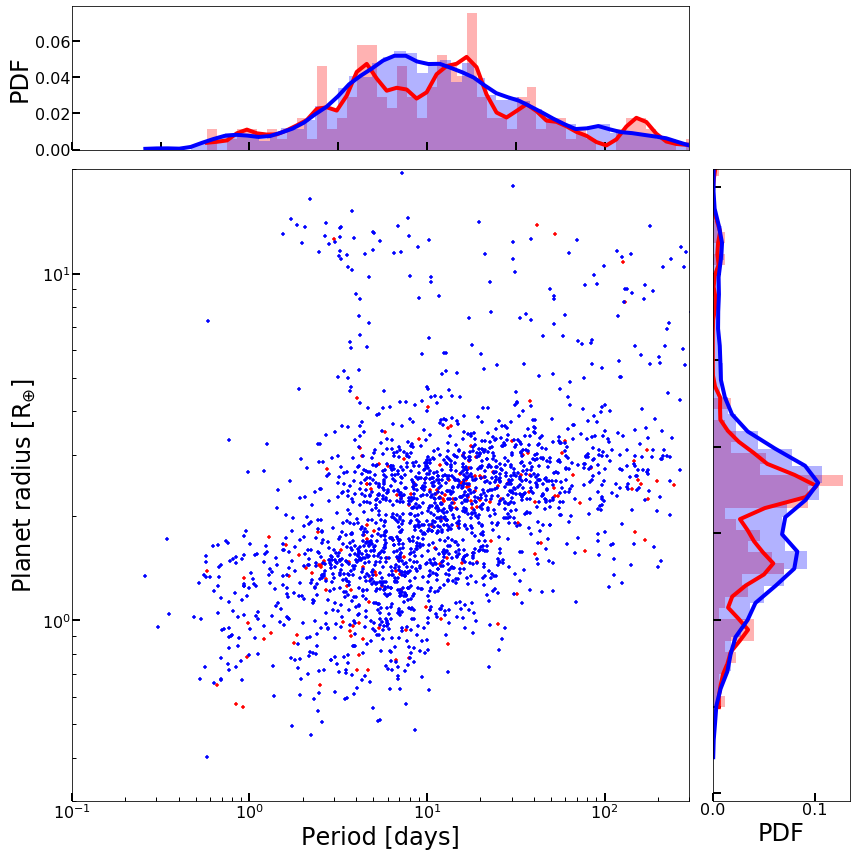

In [3]:
#draw the scatter figure of period and prad and the PDF of period and prad
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import stats
SLTELLAR_DATA1=pd.read_csv('data/DAI2020STELLAR_MS_NOBINARY_HOT_DEFINITION2_2SIGMA.csv')
PLANET_DATA1=pd.read_csv('data/DAI2020PLANET_MS_NOBINARY_HOT_DEFINITION2_2SIGMA.csv')

prad1=[]
period1=[]
logprad1=[]
logperiod1=[]
for i in range(0,len(PLANET_DATA1)):
    if  PLANET_DATA1['koi_score'][i]>=0.9 and PLANET_DATA1['koi_period'][i]<=365 and PLANET_DATA1['iso_koi_prad'][i]>0:
        prad1.append(PLANET_DATA1['iso_koi_prad'][i])
        period1.append(PLANET_DATA1['koi_period'][i])
        logprad1.append(np.log10(PLANET_DATA1['iso_koi_prad'][i]))
        logperiod1.append(np.log10(PLANET_DATA1['koi_period'][i]))

SLTELLAR_DATA2=pd.read_csv('data/DAI2020STELLAR_MS_NOBINARY_COOL_DEFINITION2_2SIGMA.csv')
PLANET_DATA2=pd.read_csv('data/DAI2020PLANET_MS_NOBINARY_COOL_DEFINITION2_2SIGMA.csv')

prad2=[]
period2=[]
logprad2=[]
logperiod2=[]
for i in range(0,len(PLANET_DATA2)):
    if  PLANET_DATA2['koi_score'][i]>=0.9 and PLANET_DATA2['koi_period'][i]<=365 and PLANET_DATA2['iso_koi_prad'][i]>0:
        prad2.append(PLANET_DATA2['iso_koi_prad'][i])
        period2.append(PLANET_DATA2['koi_period'][i])
        logprad2.append(np.log10(PLANET_DATA2['iso_koi_prad'][i]))
        logperiod2.append(np.log10(PLANET_DATA2['koi_period'][i]))

        
fig=plt.figure(figsize=(12,12))
gs = fig.add_gridspec(5, 5)
ax0 = fig.add_subplot(gs[1:5,0:4])
ax1 = fig.add_subplot(gs[1:5,4])
ax2 = fig.add_subplot(gs[0,0:4])


#ax0=fig.add_subplot(223)
ax0.scatter(period1,prad1,c='red',s=10,marker='+')
ax0.scatter(period2,prad2,c='blue',s=10,marker='+')
ax0.set_xlim(1e-1,300)
ax0.set_ylim(3e-1,2e1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Period [days]',fontsize=24)
ax0.set_ylabel('Planet radius [R$_{\oplus}$]',fontsize=24)
ax0.tick_params(axis='both',direction='in',which='major',
                width=2,length=8,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=True,labelright=False, )
ax0.tick_params(axis='both',direction='in',which='minor',
                width=1,length=4,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=True,labelright=False, )



#ax1=fig.add_subplot(224)
bins=np.linspace(np.log10(min(prad1)),np.log10(max(prad1)),50)
weights1 = np.ones_like(logprad1)/float(len(logprad1))
ax1.hist(logprad1,bins,orientation='horizontal',histtype='stepfilled',weights=weights1,color='red',linewidth=0,alpha=0.3,)

kde=stats.gaussian_kde(logprad1)
kde.set_bandwidth(bw_method=0.1)
ax1.plot(kde(bins)*(bins[1]-bins[0]),bins,'r',linewidth=4,alpha=1,)

bins=np.linspace(np.log10(min(prad2)),np.log10(max(prad2)),50)
weights1 = np.ones_like(logprad2)/float(len(logprad2))
ax1.hist(logprad2,bins,orientation='horizontal',histtype='stepfilled',weights=weights1,color='blue',linewidth=0,alpha=0.3,)

kde=stats.gaussian_kde(logprad2)
kde.set_bandwidth(bw_method=0.1)
ax1.plot(kde(bins)*(bins[1]-bins[0]),bins,'b',linewidth=4,alpha=1,)

ax1.set_ylim(np.log10(3e-1),np.log10(2e1))
#ax1.set_xscale('log')
#ax1.set_xlabel('Period [days]',fontsize=24)
ax1.set_xlabel('PDF',fontsize=24)
ax1.tick_params(axis='both',direction='in',which='major',
                width=2,length=8,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=False,labelright=False, )
ax1.tick_params(axis='both',direction='in',which='minor',
                width=1,length=4,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=False,labelright=False, )


#ax2=fig.add_subplot(221)
bins=np.linspace(min(logperiod1),max(logperiod1),50)
weights1 = np.ones_like(logperiod1)/float(len(logperiod1))
ax2.hist(logperiod1,bins,histtype='stepfilled',weights=weights1,color='red',linewidth=0,alpha=0.3,)

kde=stats.gaussian_kde(logperiod1)
kde.set_bandwidth(bw_method=0.1)
ax2.plot(bins,kde(bins)*(bins[1]-bins[0]),'r',linewidth=4,alpha=1,)

bins=np.linspace(min(logperiod2),max(logperiod2),50)
weights1 = np.ones_like(logperiod2)/float(len(logperiod2))
ax2.hist(logperiod2,bins,histtype='stepfilled',weights=weights1,color='blue',linewidth=0,alpha=0.3,)

kde=stats.gaussian_kde(logperiod2)
kde.set_bandwidth(bw_method=0.1)
ax2.plot(bins,kde(bins)*(bins[1]-bins[0]),'b',linewidth=4,alpha=1,)
ax2.set_xlim(np.log10(1e-1),np.log10(3e2))

#ax1.set_xscale('log')
#ax1.set_xlabel('Period [days]',fontsize=24)
ax2.set_ylabel('PDF',fontsize=24)
ax2.tick_params(axis='both',direction='in',which='major',
                width=2,length=8,color='black',pad=1,labelsize=16,
               labelbottom=False, labeltop=False,labelleft=True,labelright=False, )
ax2.tick_params(axis='both',direction='in',which='minor',
                width=1,length=4,color='black',pad=1,labelsize=16,
               labelbottom=False, labeltop=False,labelleft=True,labelright=False, )


plt.tight_layout()
plt.savefig('result/HOT_COOL_PERIOD_PRAD.png',dpi=300)

Text(0, 0.5, 'Planet radius [R$_{\\oplus}$]')

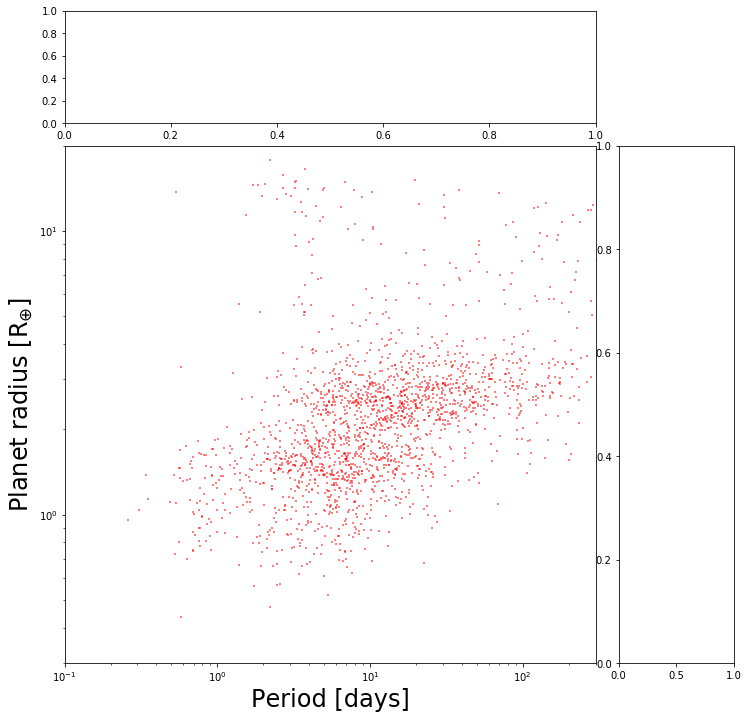

In [14]:
fig=plt.figure(figsize=(12,12))
gs = fig.add_gridspec(5, 5)
ax0 = fig.add_subplot(gs[1:5,0:4])
ax1 = fig.add_subplot(gs[1:5,4])
ax2 = fig.add_subplot(gs[0,0:4])


#ax0=fig.add_subplot(223)
ax0.scatter(period1,prad1,c='red',s=3,marker='+',alpha=0.5)
#ax0.scatter(period2,prad2,c='blue',s=3,marker='+',alpha=0.5)
ax0.set_xlim(1e-1,300)
ax0.set_ylim(3e-1,2e1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Period [days]',fontsize=24)
ax0.set_ylabel('Planet radius [R$_{\oplus}$]',fontsize=24)